In [4]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [5]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='../input/flowers-recognition/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../input/flowers-recognition/flowers/sunflower'
FLOWER_TULIP_DIR='../input/flowers-recognition/flowers/tulip'
FLOWER_DANDI_DIR='../input/flowers-recognition/flowers/dandelion'
FLOWER_ROSE_DIR='../input/flowers-recognition/flowers/rose'

**Image Augmentation**

In [6]:
def assign_label(img,flower_type):
    return flower_type

In [7]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [8]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:06<00:00, 124.38it/s]

764


In [9]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:06<00:00, 105.95it/s]

1497


In [10]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:08<00:00, 118.02it/s]

2481


In [11]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:08<00:00, 118.56it/s]

3533


In [12]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:06<00:00, 120.78it/s]

4317


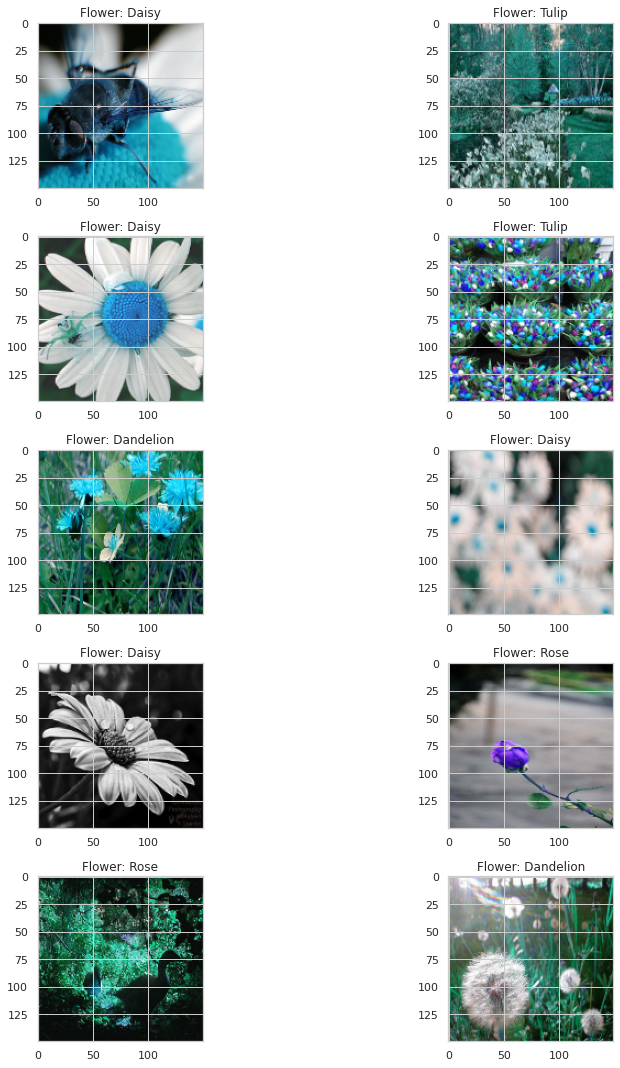

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [14]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

**Creating Model**

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [16]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

**Add Layers to Model**

In [17]:
# model using CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

2022-10-07 10:11:11.762323: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
batch_size=128
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

**Compile Model**

In [20]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

**Fit Model**

In [24]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
25/25 [==============================] - 63s 3s/step - loss: 0.8166 - accuracy: 0.6890 - val_loss: 0.9146 - val_accuracy: 0.6815
Epoch 2/10
25/25 [==============================] - 63s 2s/step - loss: 0.7767 - accuracy: 0.6948 - val_loss: 0.7801 - val_accuracy: 0.7102
Epoch 3/10
25/25 [==============================] - 64s 3s/step - loss: 0.8127 - accuracy: 0.6906 - val_loss: 0.7953 - val_accuracy: 0.7083
Epoch 4/10
25/25 [==============================] - 62s 2s/step - loss: 0.7738 - accuracy: 0.7031 - val_loss: 0.8050 - val_accuracy: 0.6991
Epoch 5/10
25/25 [==============================] - 62s 2s/step - loss: 0.7355 - accuracy: 0.7266 - val_loss: 0.7400 - val_accuracy: 0.7352
Epoch 6/10
25/25 [==============================] - 62s 2s/step - loss: 0.7102 - accuracy: 0.7221 - val_loss: 0.7775 - val_accuracy: 0.7287
Epoch 7/10
25/25 [==============================] - 63s 2s/step - loss: 0.6999 - accuracy: 0.7208 - val_loss: 0.7384 - val_accuracy: 0.7259
Epoch 8/10
25/25 [==

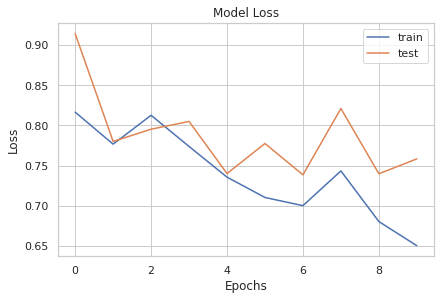

In [25]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


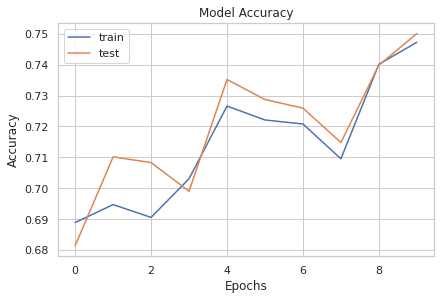

In [26]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

**Test the Model**

In [27]:
score = model.evaluate(x_test, y_test)
score

34/34 [==============================] - 5s 137ms/step - loss: 0.7583 - accuracy: 0.7500


[0.7582985162734985, 0.75]

In [28]:
# Calculate classification accuracy on the training set
score = model.evaluate(x_train, y_train)
score

102/102 [==============================] - 15s 150ms/step - loss: 0.6105 - accuracy: 0.7683


[0.6104617714881897, 0.7683039903640747]

In [33]:
# Model predictions for the testing dataset
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [34]:
test_digits = np.argmax(y_test,axis=1)

In [35]:
print("Accuracy : {}".format(accuracy_score(test_digits, pred_digits)))

Accuracy : 0.75


In [36]:
pred_labels = le.inverse_transform(pred_digits)

In [40]:
def display_random_image(Z, images, labels):    
    index = np.random.randint(len(labels))
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title('Image #{} : '.format(index) + labels[index])
    plt.show()

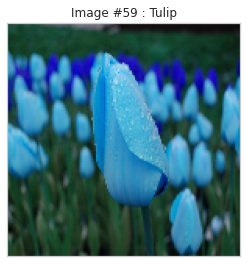

In [41]:
display_random_image(Z, x_test, pred_labels)

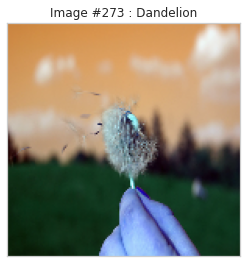

In [42]:
display_random_image(Z, x_test, pred_labels)

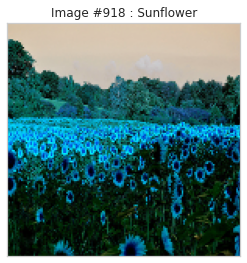

In [43]:
display_random_image(Z, x_test, pred_labels)

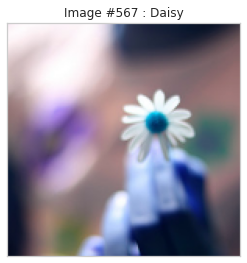

In [44]:
display_random_image(Z, x_test, pred_labels)